<a href="https://colab.research.google.com/github/RaghavendraReddy004/DV_Tasks_Repo/blob/main/DV_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset preview:
      Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0      Porsche       911  2022               3        379            331   
1  Lamborghini   Huracan  2021             5.2        630            443   
2      Ferrari   488 GTB  2022             3.9        661            561   
3         Audi        R8  2022             5.2        562            406   
4      McLaren      720S  2021               4        710            568   

  0-60 MPH Time (seconds) Price (in USD)  
0                       4        101,200  
1                     2.8        274,390  
2                       3        333,750  
3                     3.2        142,700  
4                     2.7        298,000  

Sample filtered words: ['porsche', 'lamborghini', 'huracan', 'ferrari', 'gtb', 'audi', 'mclaren', 'bmw', 'mercedesbenz', 'amg', 'chevrolet', 'corvette', 'ford', 'mustang', 'shelby', 'nissan', 'gtr', 'nismo', 'aston', 'martin', 'bugatti', 'chiron', 'dodge', 'challenge

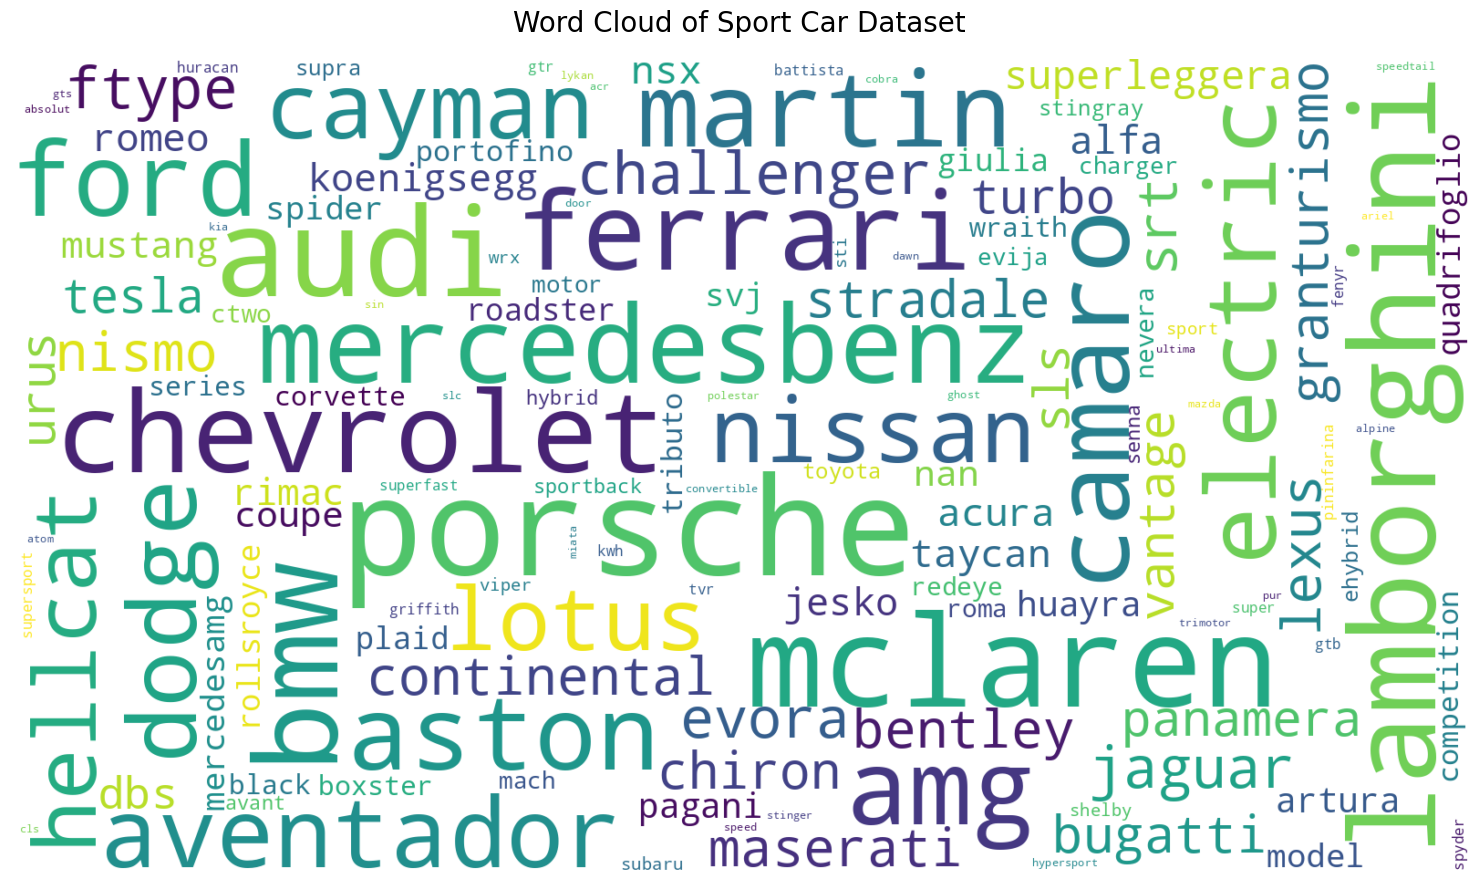


Network Summary:
Total Nodes: 135
Total Edges: 491


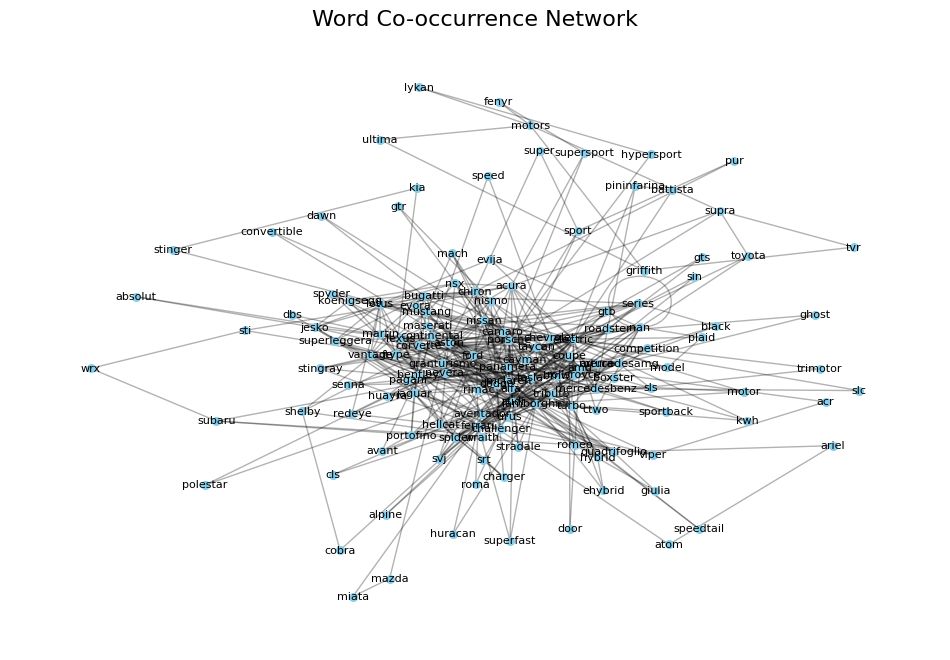


Top 10 Central Words (by Degree):
porsche: 41
audi: 40
mclaren: 35
electric: 34
lamborghini: 26
ford: 24
bmw: 23
aston: 23
ferrari: 21
lexus: 20

Detected 8 communities in the network.

Community 1: ['turbo', 'battista', 'nan', 'motor', 'ehybrid', 'roadster', 'wraith', 'evija', 'cayman', 'tesla', 'lamborghini', 'kwh', 'electric', 'pininfarina', 'huayra']
Community 2: ['lexus', 'ftype', 'bugatti', 'aventador', 'vantage', 'superleggera', 'dbs', 'stinger', 'alfa', 'jesko', 'maserati', 'ariel', 'nsx', 'lotus', 'continental']
Community 3: ['stingray', 'srt', 'corvette', 'acr', 'cobra', 'nissan', 'convertible', 'redeye', 'dodge', 'aston', 'mustang', 'gtr', 'ford', 'camaro', 'hellcat']


In [ ]:

!pip install nltk wordcloud plotly networkx matplotlib

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from itertools import combinations
from collections import Counter
import plotly.express as px

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

df = pd.read_csv("/content/Sport car price.csv")

print("Dataset preview:")
print(df.head())

text_columns = df.select_dtypes(include=['object']).columns
combined_text_list = []
for index, row in df.iterrows():
    row_text = " ".join([str(row[col]) for col in text_columns])
    combined_text_list.append(row_text)

import re
combined_text = " ".join(combined_text_list).lower()
combined_text = re.sub(r'[^a-z\s]', '', combined_text)  # keep only letters
combined_text = re.sub(r'\s+', ' ', combined_text).strip()

tokens = word_tokenize(combined_text)
stop_words = set(stopwords.words('english'))

filtered_words = [word for word in tokens if word not in stop_words and len(word) > 2]

print("\nSample filtered words:", filtered_words[:50])
print(f"Total tokens after cleaning: {len(filtered_words)}")

wordcloud = WordCloud(
    width=1600,
    height=900,
    background_color='white',
    colormap='viridis',
    max_words=200,
    max_font_size=150,
    relative_scaling=0.5,
    collocations=False
).generate(" ".join(filtered_words))

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Sport Car Dataset", fontsize=20, pad=20)
plt.tight_layout()
plt.show()

window_size = 2
edges = []

for i in range(len(filtered_words) - window_size):
    window = filtered_words[i:i + window_size]
    for pair in combinations(window, 2):
        edges.append(tuple(sorted(pair)))

edge_freq = Counter(edges)

G = nx.Graph()
for (w1, w2), freq in edge_freq.items():
    G.add_edge(w1, w2, weight=freq)

print("\nNetwork Summary:")
print(f"Total Nodes: {len(G.nodes())}")
print(f"Total Edges: {len(G.edges())}")

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Word Co-occurrence Network", fontsize=16)
plt.axis('off')
plt.show()

degree_dict = dict(G.degree())
sorted_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 Central Words (by Degree):")
for word, degree in sorted_nodes[:10]:
    print(f"{word}: {degree}")

from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
print(f"\nDetected {len(communities)} communities in the network.\n")

for i, c in enumerate(list(communities)[:3]):
    print(f"Community {i+1}: {list(c)[:15]}")

edges_df = pd.DataFrame(
    [(u, v, d['weight']) for u, v, d in G.edges(data=True)],
    columns=['Source', 'Target', 'Weight']
)

fig = px.scatter(
    x=[pos[n][0] for n in G.nodes()],
    y=[pos[n][1] for n in G.nodes()],
    text=list(G.nodes()),
    size=[G.degree(n)*3 for n in G.nodes()],
    title="Interactive Word Network (Plotly)"
)
fig.update_traces(textposition='top center')
fig.show()
